In [49]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [50]:
data = pd.read_csv('../data/raw/telecom_churn.csv')
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [51]:
# Inspect all the data column.
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

We can see that there exist 51 state in this dataframe. 

In [52]:
# Drop useless columns
data = data.drop(columns=["Account length", "State", "Area code"])
data

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [53]:
# We then tryna to check for the data type and convert it to the right format where it should belongs.
data.dtypes

International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [54]:
data.select_dtypes(include=['int64', 'float64'])

,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [55]:
data.select_dtypes(include='object').columns.to_list()

['International plan', 'Voice mail plan']

In [56]:
for i in data.select_dtypes(include='object').columns.to_list(): 
    data[i] = data[i].astype('category')

In [59]:
data.dtypes

International plan        category
Voice mail plan           category
Number vmail messages        int64
Total day minutes          float64
Total day calls              int64
Total day charge           float64
Total eve minutes          float64
Total eve calls              int64
Total eve charge           float64
Total night minutes        float64
Total night calls            int64
Total night charge         float64
Total intl minutes         float64
Total intl calls             int64
Total intl charge          float64
Customer service calls       int64
Churn                     category
dtype: object

In [63]:
data.shape

(3333, 17)

## Check for Null value. 

In [64]:
# Check for null value in the dataframe 
data.isnull().sum()

International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [83]:
# Check if the data have null values. 
if data.isnull().sum().any()==False:
    print("the data have missinng values")

the data have missinng values


Check for the distribution of the dataframe

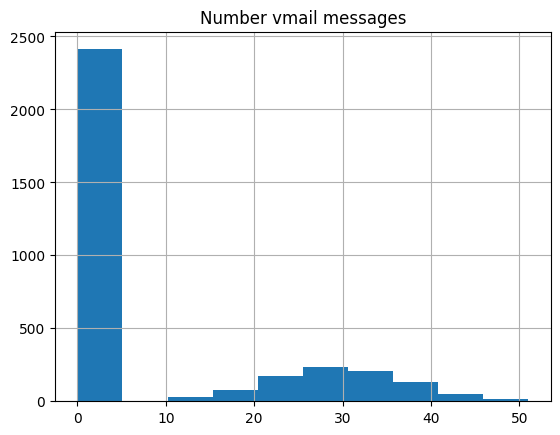

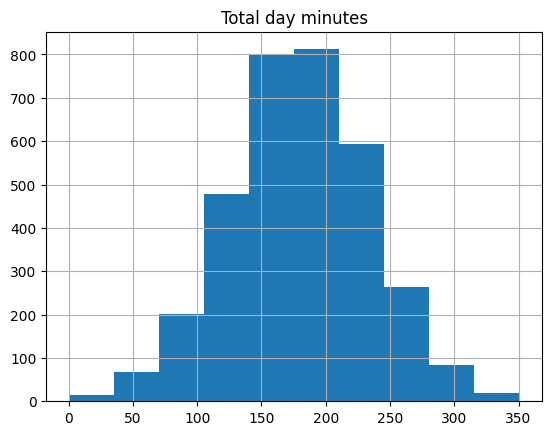

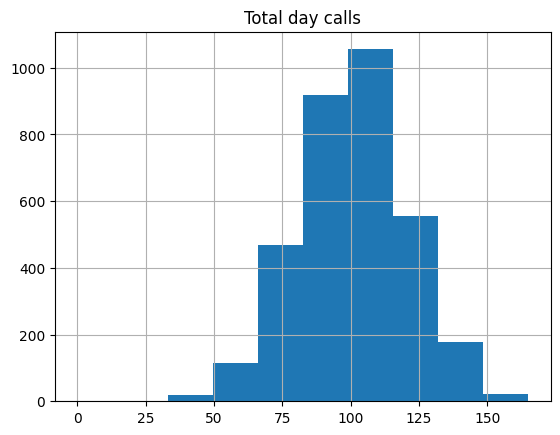

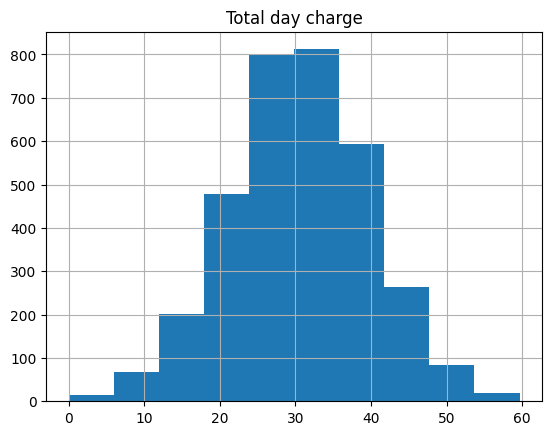

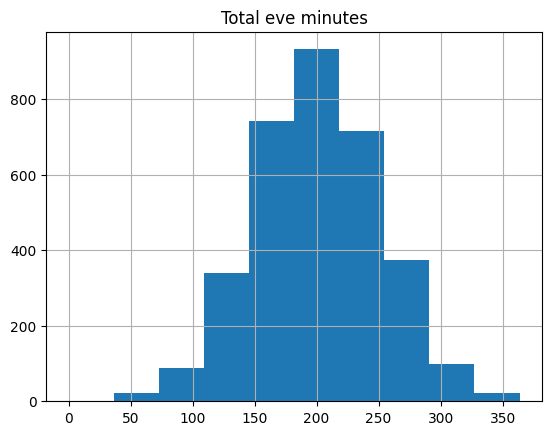

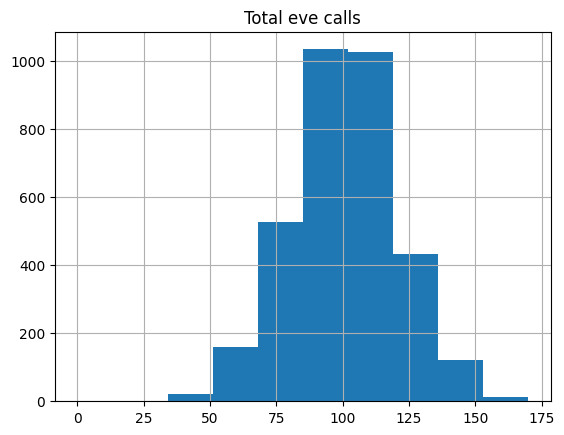

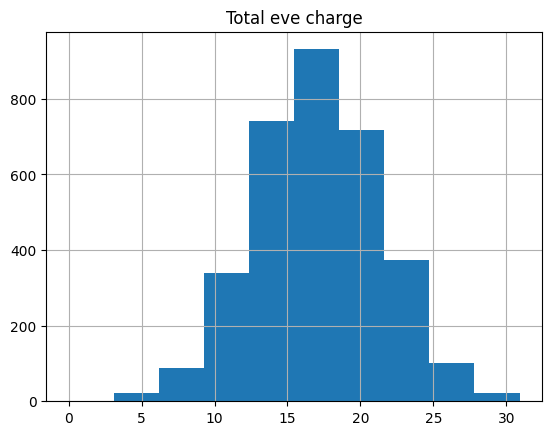

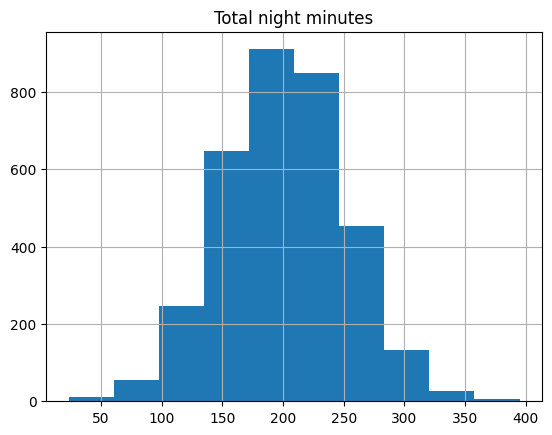

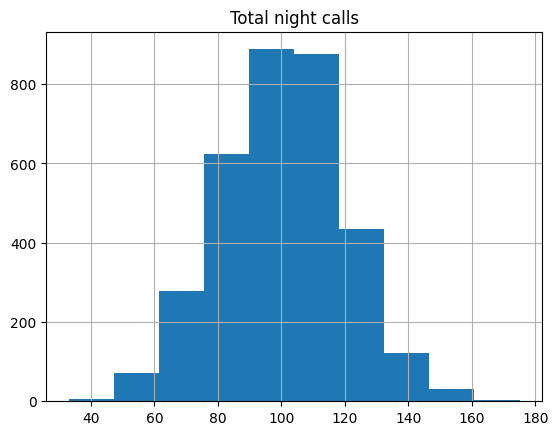

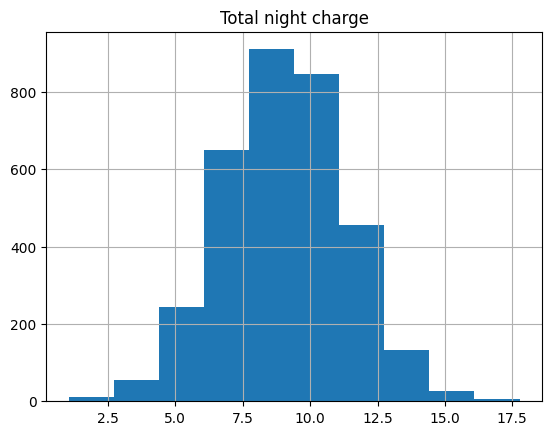

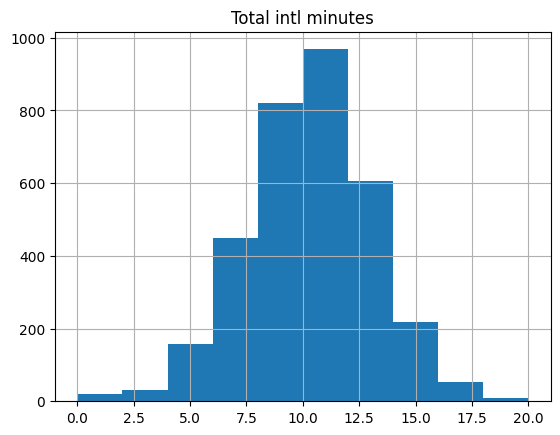

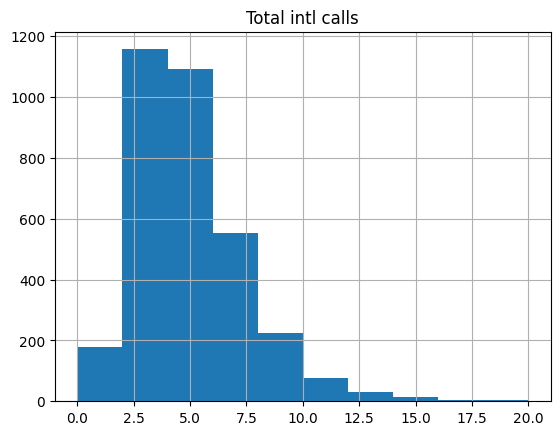

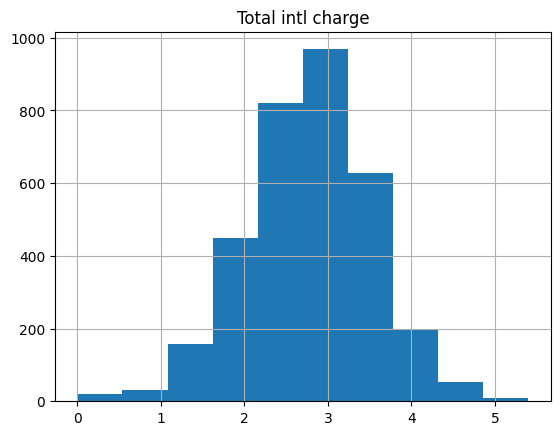

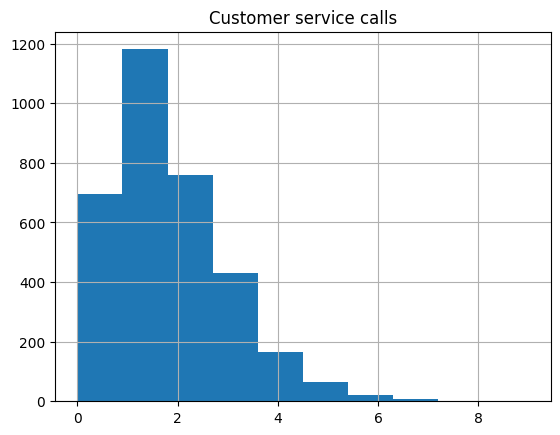

In [65]:
for num_col in data.select_dtypes(include=['int64', 'float64']):
    data.hist(column=num_col)

After checking the distribution, we saw that for numerical values, mostly have a normal distribution, therefore in case of dealing with missing value, we can use mean for impute those value. 

Now we check for the category value 

In [77]:
data.select_dtypes(include='category').columns.to_list()

['International plan', 'Voice mail plan', 'Churn']

<Axes: xlabel='International plan'>

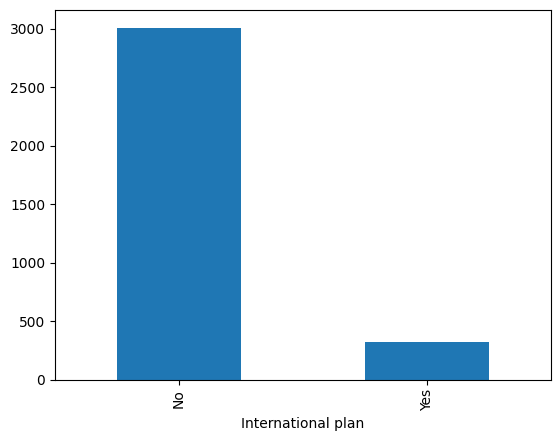

In [79]:
data["International plan"].value_counts().plot(kind='bar')

<Axes: xlabel='Voice mail plan'>

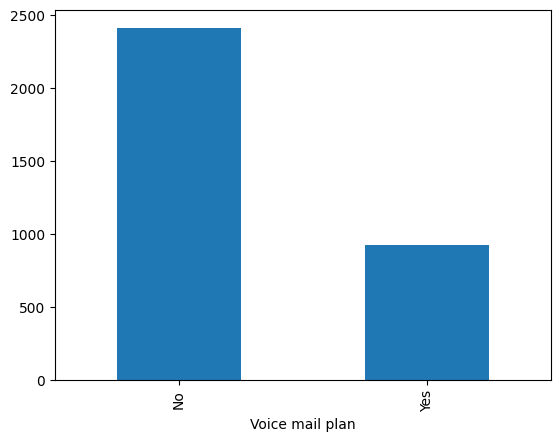

In [80]:
data["Voice mail plan"].value_counts().plot(kind='bar')

## Encoding data

First, we care about the categorical value since it's more complicated 

In [84]:
data.select_dtypes(include='category')

,International plan,Voice mail plan,Churn
0,No,Yes,False
1,No,Yes,False
2,No,No,False
3,Yes,No,False
4,Yes,No,False
...,...,...,...
3328,No,Yes,False
3329,No,No,False
3330,No,No,False
3331,Yes,No,False


In our case, we can observe that with our data, all of the categorical variables are not following any presume order. We try to see whether if we use onehotencoding, will our new dataframe will be sparse or not. 

In [97]:
# Not working
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer

# Identify numerical columns
num_col = data.select_dtypes(include=['int64', 'float64'])

# Identify categorical columns 
cat_col = data.select_dtypes(include='category').columns.values.tolist()

# Create a columntransformer to appy onehotencoder
column_transformer = ColumnTransformer(
    [('categories', OneHotEncoder(), cat_col),
     ('numerical'), StandardScaler(), make_column_selector(dtype_include=np.number)]
)

# Fit and transform the DataFrame
# encoded_data = column_transformer.fit_transform(data)

TypeError: 'StandardScaler' object is not iterable

In [98]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Identify numerical columns
num_col = data.select_dtypes(include=['int64', 'float64']).columns.values.tolist()

# Identify categorical columns 
cat_col = data.select_dtypes(include='category').columns.values.tolist()

# Encoding the data
numeric_transformer = Pipeline(
    steps=[("Scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[('OneHotEncoder', OneHotEncoder(handle_unknown='ignore'))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_col),
        ('cat', categorical_transformer, cat_col)
    ]
)

encoded_data = preprocessor.fit_transform(data)

In [103]:
encoded_data[:,18:20]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])